In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree


used pip to install the libs and then imported what was needed 

In [3]:
CreditData=pd.read_csv("credit.csv")
CreditData.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [4]:
CreditData.shape

(1000, 17)

In [5]:
CreditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [6]:
for feature in CreditData.columns:
    if CreditData[feature].dtype == 'object':
        CreditData[feature] = pd.Categorical(CreditData[feature])

CreditData.head()


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [7]:
CreditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [8]:
print(CreditData.checking_balance.value_counts())
print(CreditData.credit_history.value_counts())
print(CreditData.purpose.value_counts())
print(CreditData.savings_balance.value_counts())
print(CreditData.employment_duration.value_counts())
print(CreditData.other_credit.value_counts())
print(CreditData.housing.value_counts())
print(CreditData.job.value_counts())
print(CreditData.phone.value_counts())

checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64
credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64
purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64
savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64
employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: count, dtype: int64
other_credit
none     814
bank     139
store     47
Name: count, dtype: int64
housing
own      713
rent     179
other    108
Name: count, dtype: int64
job
skilled       630
unskilled     200
management    148
unemployed     22
Name: count, dtype: int64
phone
no     596

In [9]:
#those features with order in their categories 

replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                "job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 }
                    }


#those features with NO order in their categories
oneHotCols=["purpose","housing","other_credit","job"]


In [10]:
CreditData=CreditData.replace(replaceStruct)
CreditData=pd.get_dummies(CreditData, columns=oneHotCols)
CreditData.head(10)


,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_4,job_3,job_1,job_2
0,1,6,1,1169,-1,5,4,4,67,2,...,False,True,False,False,True,False,False,True,False,False
1,2,48,3,5951,1,3,2,2,22,1,...,False,True,False,False,True,False,False,True,False,False
2,-1,12,1,2096,1,4,2,3,49,1,...,False,True,False,False,True,False,False,False,False,True
3,1,42,3,7882,1,4,2,4,45,1,...,True,False,False,False,True,False,False,True,False,False
4,1,24,2,4870,1,3,3,4,53,2,...,True,False,False,False,True,False,False,True,False,False
5,-1,36,3,9055,-1,3,2,4,35,1,...,True,False,False,False,True,False,False,False,False,True
6,-1,24,3,2835,3,5,3,4,53,1,...,False,True,False,False,True,False,False,True,False,False
7,2,36,3,6948,1,3,2,2,35,1,...,False,False,True,False,True,False,True,False,False,False
8,-1,12,3,3059,4,4,2,4,61,1,...,False,True,False,False,True,False,False,False,False,True
9,2,30,1,5234,1,1,4,2,28,2,...,False,True,False,False,True,False,True,False,False,False


In [11]:
CreditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              1000 non-null   category
 1   months_loan_duration          1000 non-null   int64   
 2   credit_history                1000 non-null   category
 3   amount                        1000 non-null   int64   
 4   savings_balance               1000 non-null   category
 5   employment_duration           1000 non-null   category
 6   percent_of_income             1000 non-null   int64   
 7   years_at_residence            1000 non-null   int64   
 8   age                           1000 non-null   int64   
 9   existing_loans_count          1000 non-null   int64   
 10  dependents                    1000 non-null   int64   
 11  phone                         1000 non-null   category
 12  default                       1000 non-null   cat

In [12]:
CreditData.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_4,job_3,job_1,job_2
0,1,6,1,1169,-1,5,4,4,67,2,...,False,True,False,False,True,False,False,True,False,False
1,2,48,3,5951,1,3,2,2,22,1,...,False,True,False,False,True,False,False,True,False,False
2,-1,12,1,2096,1,4,2,3,49,1,...,False,True,False,False,True,False,False,False,False,True
3,1,42,3,7882,1,4,2,4,45,1,...,True,False,False,False,True,False,False,True,False,False
4,1,24,2,4870,1,3,3,4,53,2,...,True,False,False,False,True,False,False,True,False,False


fixing other (true/false values)

In [13]:

cd1 = pd.DataFrame(CreditData)

# Convert True and False to 1 and 0
cd1 = cd1.astype(int)

# Now, the values in the DataFrame will be 0 and 1
print(cd1)


     checking_balance  months_loan_duration  credit_history  amount  \
0                   1                     6               1    1169   
1                   2                    48               3    5951   
2                  -1                    12               1    2096   
3                   1                    42               3    7882   
4                   1                    24               2    4870   
..                ...                   ...             ...     ...   
995                -1                    12               3    1736   
996                 1                    30               3    3857   
997                -1                    12               3     804   
998                 1                    45               3    1845   
999                 2                    45               1    4576   

     savings_balance  employment_duration  percent_of_income  \
0                 -1                    5                  4   
1                  

In [14]:
cd1.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_4,job_3,job_1,job_2
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0


splitting data 

In [15]:
X = cd1.drop("default" , axis=1)
y = cd1.pop("default")

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

building decison tree 

In [17]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

scoring the decison tree 

In [18]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))



1.0
0.6933333333333334


visualing tree


In [19]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [20]:
 pip install graphviz

Note: you may need to restart the kernel to use updated packages.


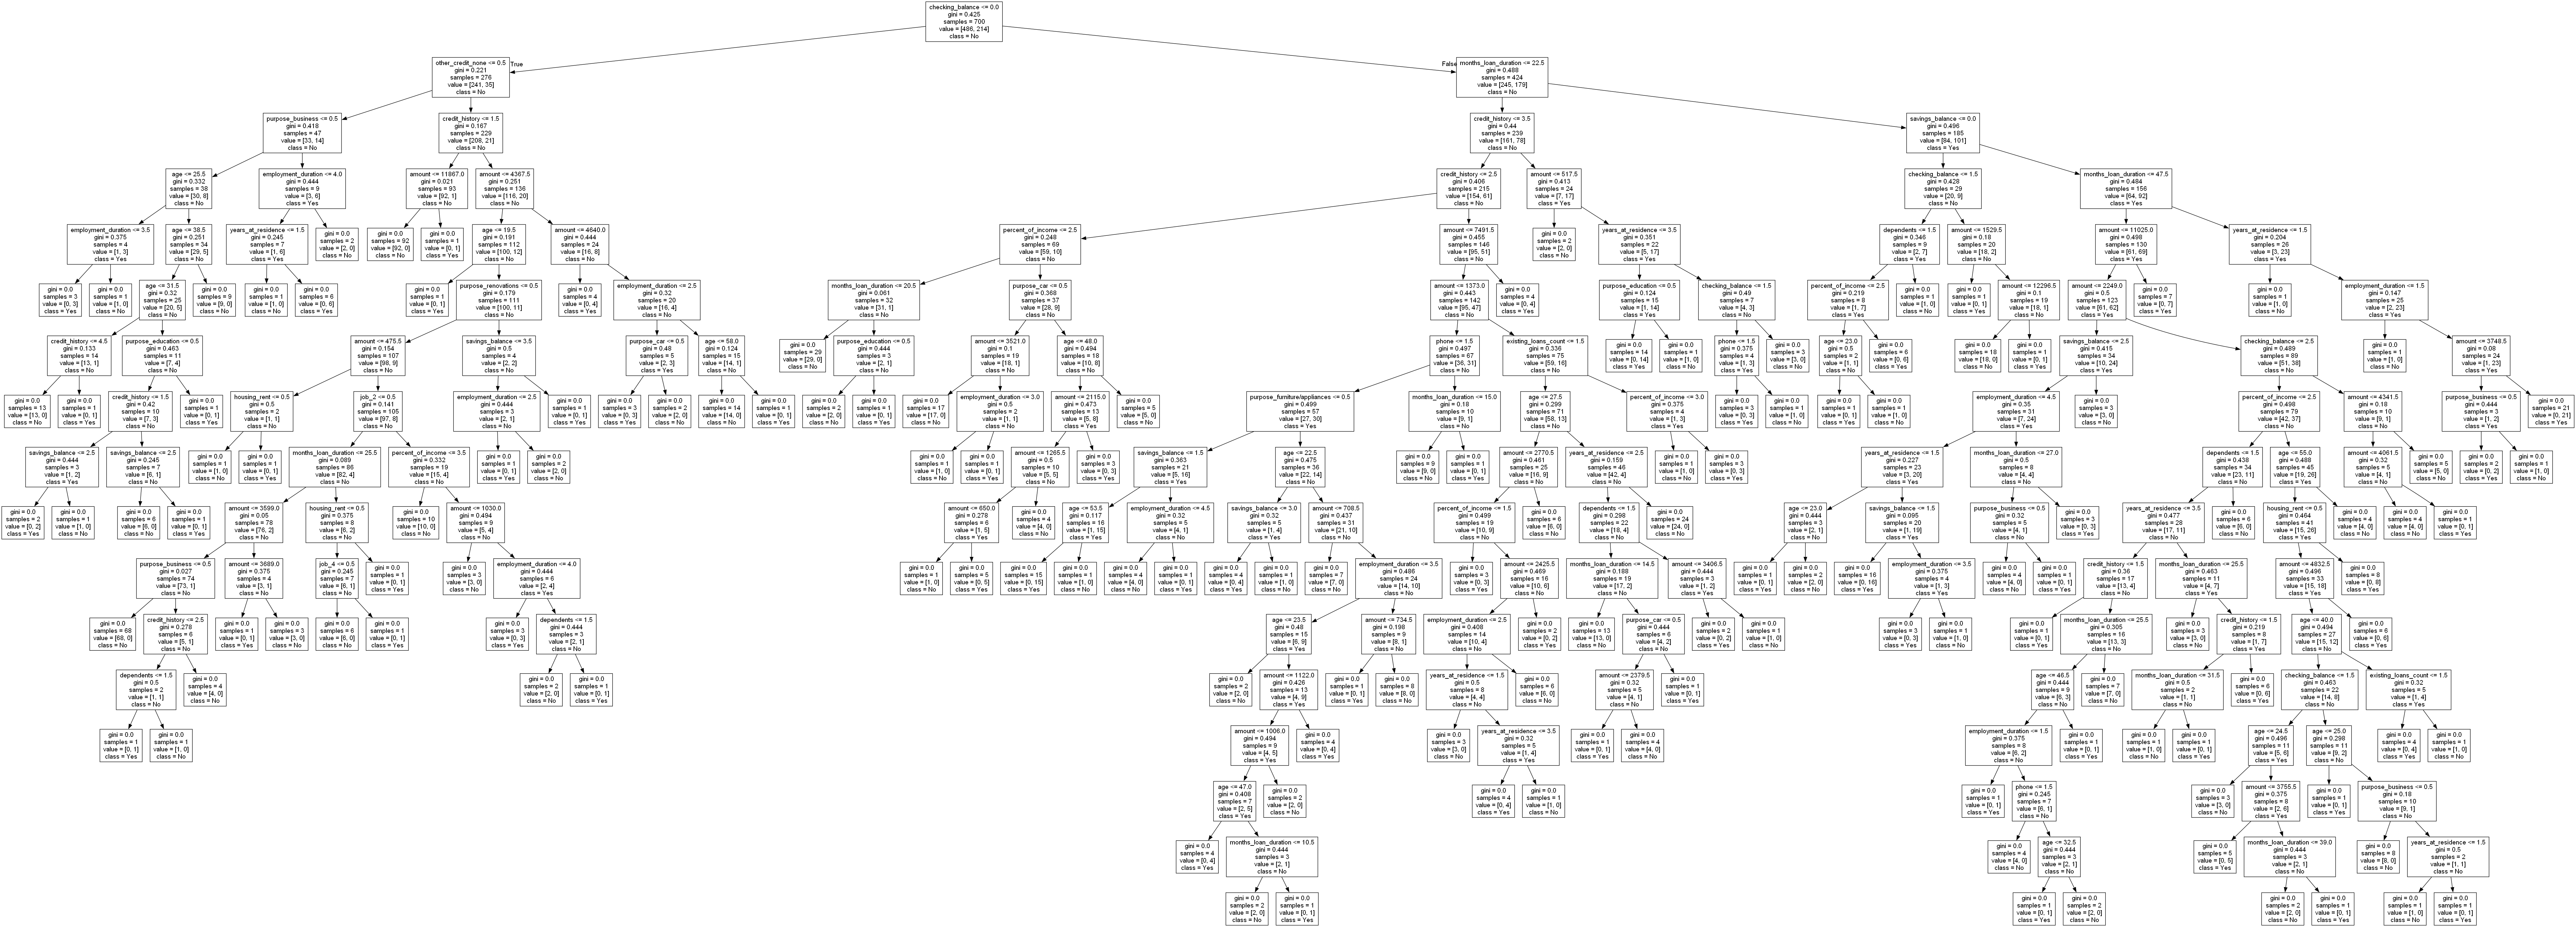

In [21]:
import subprocess
from IPython.display import Image, display

# Attempt to execute the "dot" command
retCode = subprocess.call("dot -Tpng credit_tree.dot -o credit_tree.png", shell=True)

if retCode > 0:
    print("System command returning error: " + str(retCode))
else:
    # Display the generated image
    display(Image("credit_tree.png"))


pruning the data

In [22]:
dTreev2 = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=1)
dTreev2.fit(X_train, y_train)
print(dTreev2.score(X_train, y_train))
print(dTreev2.score(X_test, y_test))

0.7528571428571429
0.7433333333333333


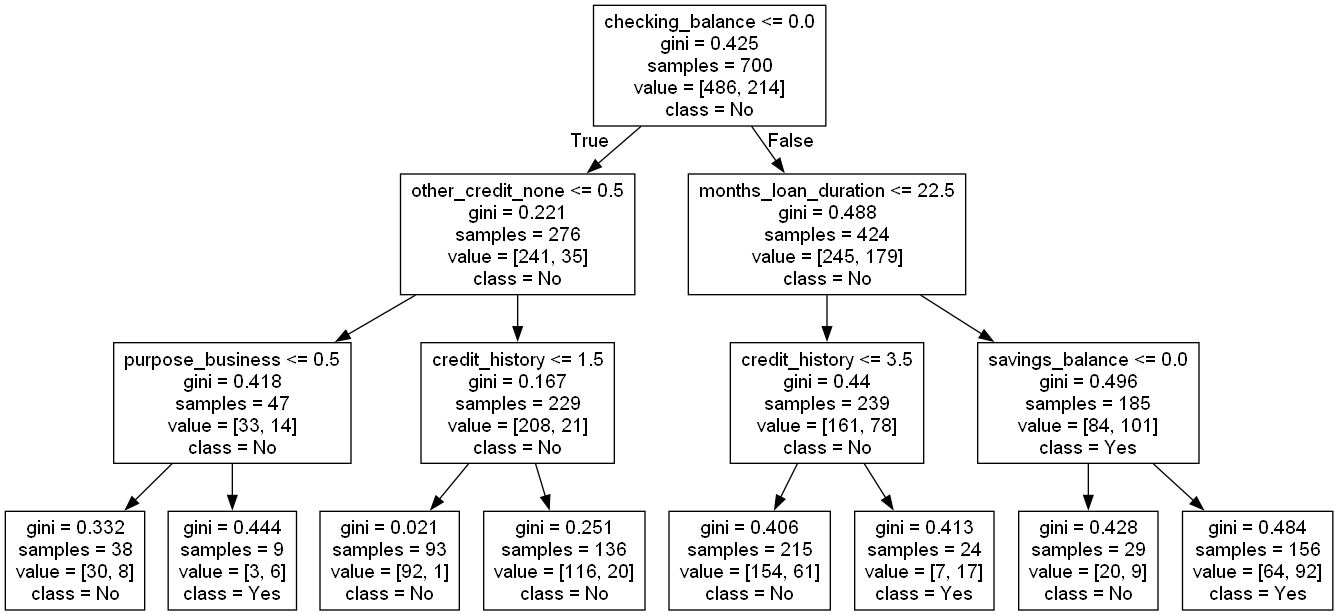

In [23]:
import subprocess
from IPython.display import Image, display

# Export the decision tree to a DOT file
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treev2.dot', 'w')
dot_data = tree.export_graphviz(dTreev2, out_file=Credit_Tree_FileR, feature_names=list(X_train), class_names=list(train_char_label))
Credit_Tree_FileR.close()

# Use the 'dot' command to generate a PNG image from the DOT file
retCode = subprocess.call("dot -Tpng -Gmaxiter=1000 -Gmaxdepth=3 credit_treev2.dot -o credit_treev2_pruned.png", shell=True)

if retCode > 0:
    print("System command returned error: " + str(retCode))
else:
    # Display the pruned tree image
    display(Image("credit_treev2_pruned.png"))


which features are most important

In [24]:
print (pd.DataFrame(dTreev2.feature_importances_, columns = ["Importance"], index = X_train.columns))

                              Importance
checking_balance                0.492510
months_loan_duration            0.169806
credit_history                  0.166109
amount                          0.000000
savings_balance                 0.064467
employment_duration             0.000000
percent_of_income               0.000000
years_at_residence              0.000000
age                             0.000000
existing_loans_count            0.000000
dependents                      0.000000
phone                           0.000000
purpose_business                0.051129
purpose_car                     0.000000
purpose_car0                    0.000000
purpose_education               0.000000
purpose_furniture/appliances    0.000000
purpose_renovations             0.000000
housing_other                   0.000000
housing_own                     0.000000
housing_rent                    0.000000
other_credit_bank               0.000000
other_credit_none               0.055977
other_credit_sto

Removing irrevent featurers( Underfitting )

feature selection 

In [25]:
new_creditData= CreditData[['checking_balance', 
                            'months_loan_duration',
                            'credit_history',
                            'savings_balance' ,
                            'purpose_business',
                            'other_credit_none' ]]

In [26]:
new_creditData.head()

,checking_balance,months_loan_duration,credit_history,savings_balance,purpose_business,other_credit_none
0,1,6,1,-1,False,True
1,2,48,3,1,False,True
2,-1,12,1,1,False,True
3,1,42,3,1,False,True
4,1,24,2,1,False,True


In [27]:
ncd1 = pd.DataFrame(new_creditData)

# Convert True and False to 1 and 0
ncd1 = ncd1.astype(int)

# Now, the values in the DataFrame will be 0 and 1
print(ncd1)


     checking_balance  months_loan_duration  credit_history  savings_balance  \
0                   1                     6               1               -1   
1                   2                    48               3                1   
2                  -1                    12               1                1   
3                   1                    42               3                1   
4                   1                    24               2                1   
..                ...                   ...             ...              ...   
995                -1                    12               3                1   
996                 1                    30               3                1   
997                -1                    12               3                1   
998                 1                    45               3                1   
999                 2                    45               1                2   

     purpose_business  other_credit_non

In [28]:
ncd1.head()

,checking_balance,months_loan_duration,credit_history,savings_balance,purpose_business,other_credit_none
0,1,6,1,-1,0,1
1,2,48,3,1,0,1
2,-1,12,1,1,0,1
3,1,42,3,1,0,1
4,1,24,2,1,0,1


In [29]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.30,random_state=1)

In [30]:
dtree= DecisionTreeClassifier(criterion = "gini", random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [31]:
print(dtree.score(X_train,y_train))
print(dtree.score(X_test,y_test))

1.0
0.6933333333333334


0.7433333333333333


<Axes: >

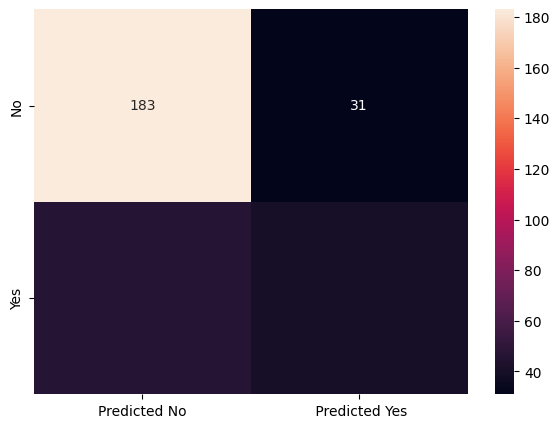

In [32]:
print(dTreev2.score(X_test , y_test))
y_predict = dTreev2.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


Bagging

In [33]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7733333333333333


<Axes: >

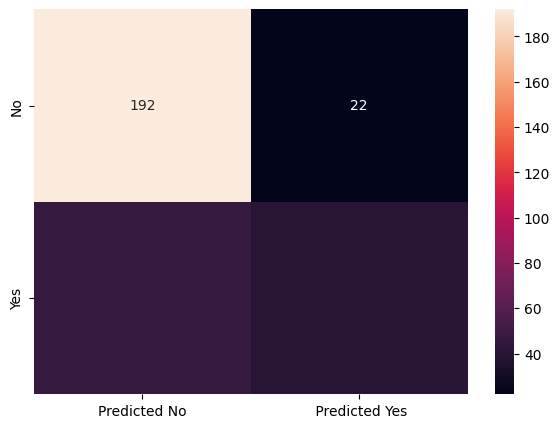

In [34]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



adaboosting

In [35]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)


0.74


<Axes: >

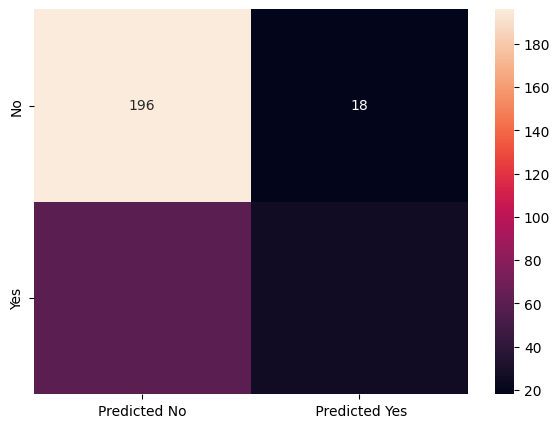

In [36]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



Gradient boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


0.74


<Axes: >

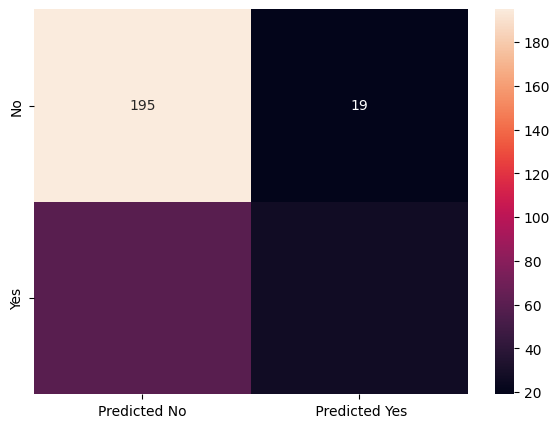

In [38]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

XG boost

In [39]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [40]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier
xgb = XGBClassifier()

# Train the XGBoost model
xgb.fit(X_train, y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

0.7166666666666667


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

<Axes: >

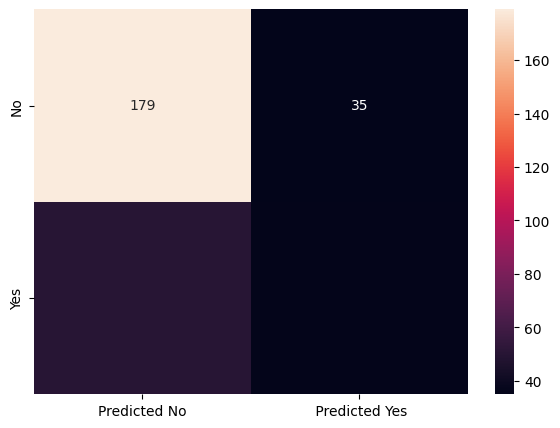

In [41]:
y_predict = xgb.predict(X_test)
print(xgb.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


Random forest Classifier 

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


0.7766666666666666


<Axes: >

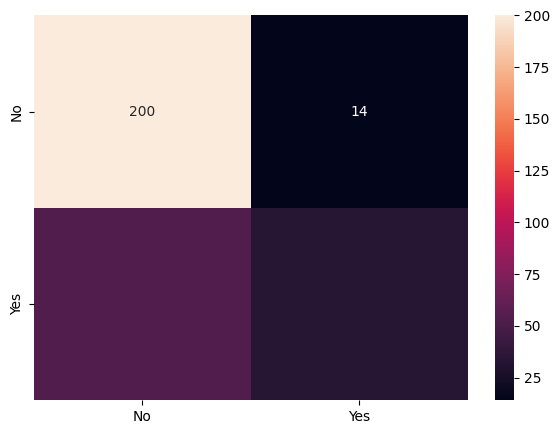

In [43]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')